In [1]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
#read in csv
datasetPath = 'depth_train_dataset.csv'
dataList = []
labelList = []
for i, row in enumerate(open(datasetPath)):
    if i == 0: continue #skip first row, header rown
    # parse the label and image from the row
    row = row.split(",")
    #print(row)
    label = int(row[0])
    datarow = np.array([x for x in row[1:6]], dtype="float32")
    
    #print(datarow)
    
    dataList.append(datarow)
    labelList.append(label)
data = np.array(dataList, dtype="float32")
labels = np.array(labelList, dtype="int")

#then scale the data
sc = StandardScaler()
data = sc.fit_transform(data)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=3) # 70% training and 30% test



In [23]:
print(X_train[:,1])

[ 0.00000000e+00 -4.62893069e-01  2.15517241e-03 -1.53508767e-01
 -3.87019217e-01  3.76824826e-01 -3.14603359e-01  3.00759017e-01
 -1.87500000e-01 -2.92179793e-01 -1.74878344e-01 -4.33962256e-01
  2.68629819e-01  1.27969116e-01  2.80878872e-01  1.96298987e-01
  4.79088634e-01 -3.83713931e-01 -3.09306562e-01  1.00973234e-01
  7.38916248e-02  0.00000000e+00 -1.17836259e-01 -1.48722634e-01
  3.38679254e-01  0.00000000e+00  0.00000000e+00 -4.69521046e-01
 -9.23645333e-04 -1.29062504e-01 -1.48640096e-01  2.39405438e-01
  4.45287794e-01  2.71033645e-01  1.19544595e-01  3.35158139e-01
 -3.83713931e-01  8.53365362e-02  2.75841355e-01 -1.85036942e-01
 -1.24843942e-03 -3.68214518e-01  9.81033314e-04 -3.04136246e-01
  2.40147784e-01  3.43596071e-01 -1.91194579e-01 -1.56250002e-03
  2.77044028e-01 -1.80183128e-01 -1.90699130e-01 -4.07066494e-01
  4.49513376e-01 -3.63377601e-01  4.40251594e-03 -2.90712893e-01
  3.60877395e-01  3.43274862e-01 -2.97752798e-01  1.09857479e-02
 -1.52019009e-01 -2.75016

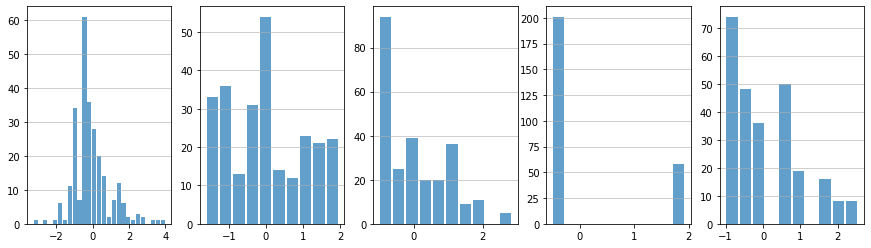

In [28]:
# Feature Scaling Test
#from sklearn.preprocessing import StandardScaler

#first plot nonscaled data
fig, axs = plt.subplots(1, 5)
fig.set_figwidth(15)
for i, ax in enumerate(axs.reshape(-1)): 
    n, bins, patches = ax.hist(x=X_train[:,i], bins='auto', alpha=0.7, rwidth=0.85)
    ax.grid(axis='y', alpha=0.75)
    #ax.xlabel('Value {}'.format(i))
    #ax.ylabel('Frequency')


# #then scale the data
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# #X_train = sc.fit(X_train)
# #X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

# #now plot scaled data
# fig2, axs2 = plt.subplots(1, 5)
# fig2.set_figwidth(15)
# for i, ax in enumerate(axs2.reshape(-1)): 
#     n, bins, patches = ax.hist(x=X_train[:,i], bins='auto', alpha=0.7, rwidth=0.85)
#     ax.grid(axis='y', alpha=0.75)


In [72]:
#SVM linear model
#Create a svm Classifier
clf = svm.SVC(kernel='linear', class_weight='balanced', gamma='scale', random_state=112) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8928571428571429
Precision: 0.4
Recall: 1.0
F1 Score: 0.5714285714285715


In [84]:
#SVM gaussian model
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', class_weight='balanced', gamma='scale', random_state=8) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9285714285714286
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


In [47]:
#SVM Polynomial model
#Create a svm Classifier
clf = svm.SVC(kernel='poly', degree=4, class_weight='balanced', gamma='scale', random_state=11) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_trainpred = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("TRAIN")

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_trainpred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_train, y_trainpred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_train, y_trainpred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_train, y_trainpred))

print("TEST")

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_test, y_pred))

TRAIN
Accuracy: 0.9845559845559846
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889
TEST
Accuracy: 0.9821428571428571
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889


In [79]:
#SVM sigmoid model
#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid', class_weight='balanced', gamma='scale', random_state=112) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7410714285714286
Precision: 0.08
Recall: 0.25
F1 Score: 0.12121212121212122


In [71]:
#logistic regression model
#Create
clf = linear_model.LogisticRegression(class_weight='balanced', random_state=None) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: # correctly predicted positives / # predicted as positive
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: # correctly predicted positives / # actual positives
print("Recall:",metrics.recall_score(y_test, y_pred))

# F1 Score F1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:",metrics.f1_score(y_test, y_pred))


Accuracy: 0.9017857142857143
Precision: 0.42105263157894735
Recall: 1.0
F1 Score: 0.5925925925925926


In [62]:
#random forest model





4.0789046
1.9235044
[-1.1104561  -1.6329515  -0.66361654 -0.5371752 ]
[ 0.43669268  0.06361189  1.8991386  -0.5371752 ]


In [32]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[102   2]
 [  0   8]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       104
           1       0.80      1.00      0.89         8

    accuracy                           0.98       112
   macro avg       0.90      0.99      0.94       112
weighted avg       0.99      0.98      0.98       112



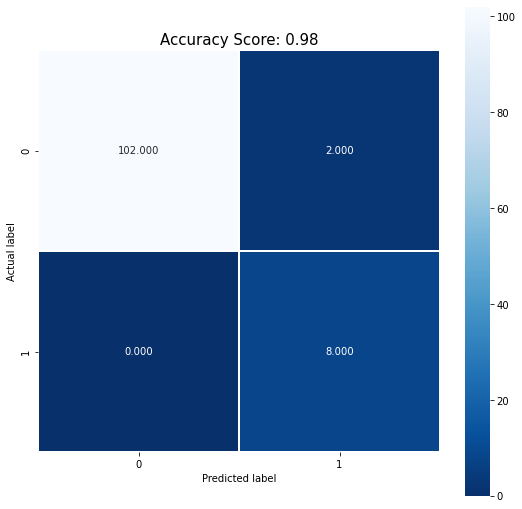

In [48]:
score = clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.2f}'.format(score)
plt.title(all_sample_title, size = 15);

In [56]:
#from: https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/
from pickle import dump
# save the model
dump(clf, open('word_number_model.pkl', 'wb'))
# save the scaler
dump(sc, open('word_number_scaler.pkl', 'wb'))